# Нижнекамскшина

**Химическая промышленность / [Нижнекамскшина](https://shinakama.tatneft.ru) (NKSH)**

> Крупнейшее предприятие шинной промышленности Российской Федерации, в числе лидеров среди производителей легковых и легкогрузовых шин в странах СНГ. <...> ПАО «Нижнекамскшина» стал первым поставщиком на российском рынке, который омологировал шины на автомобильные заводы таких крупнейших иностранных автопроизводителей, как Fiat, Volkswagen, Skoda и Ford. (*оф. сайт Нижнекамскшина*)

## Менеджмент

...

In [7]:
company = 'NKSH'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dt = pd.read_csv('../tables/data_NKSH.csv', index_col=0)
dt = dt.sort_index()
n_years = len(dt.index)

In [10]:
dt

,share_price,dividend,revenue,cost_price,capital,assets,net_profit,n_shares,current_assets,short_obligations
2014,10.5,0,1.340000e+10,1.250000e+10,8.050000e+08,6.910000e+09,-200000000.0,65700000.0,NaN,NaN
2015,10.0,0,1.510000e+10,1.389000e+10,8.970000e+08,8.210000e+09,-154000000.0,65700000.0,NaN,NaN
2016,10.8,0,1.530000e+10,1.400000e+10,7.860000e+08,9.010000e+09,-359000000.0,65700000.0,NaN,NaN
2017,14.7,0,1.660000e+10,1.540000e+10,9.180000e+08,8.370000e+09,54400000.0,65700000.0,NaN,NaN
2018,13.2,0,2.040000e+10,1.900000e+10,1.448000e+09,8.710000e+09,472500000.0,65700000.0,1.600000e+09,6.500000e+09
2019,22.0,0,1.480000e+10,1.400000e+10,2.075000e+09,7.980000e+09,11500000.0,65700000.0,1.030000e+09,5.200000e+09


In [11]:
dt['obligations'] = dt['assets'] - dt['capital']
dt['capitalization'] = dt['n_shares']*dt['share_price']

## Динамика выручки, капитала, обязательств, активов

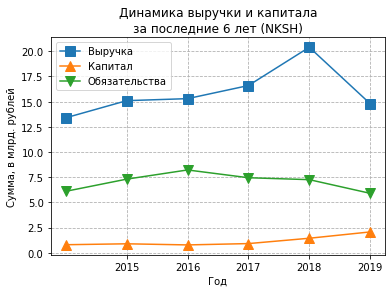

In [12]:
plt.plot(dt.index, dt['revenue']*1e-9, marker='s', ms=10, label='Выручка')
plt.plot(dt.index, dt['capital']*1e-9, marker='^', ms=10, label='Капитал')
plt.plot(dt.index, dt['obligations']*1e-9, marker='v', ms=10, label='Обязательства')
plt.xticks([2015, 2016, 2017, 2018, 2019], [2015, 2016, 2017, 2018, 2019])
plt.legend()
plt.title(f'Динамика выручки и капитала\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд. рублей')
plt.grid(ls='--')
# plt.savefig('../images/revenue.png', dpi=200)

Компания не растёт, выручка росла до 2018 года, в 2019 году падение

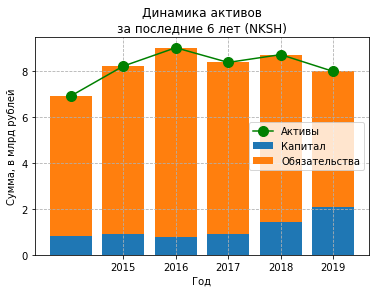

In [23]:
plt.plot(dt.index, dt['assets']*1e-9, marker='o', ms=10, label='Активы', c='g')
plt.bar(dt.index, dt['capital']*1e-9, label='Капитал')
plt.bar(dt.index, dt['obligations']*1e-9, bottom=dt['capital']*1e-9, label='Обязательства')
plt.xticks([2015, 2016, 2017, 2018, 2019], [2015, 2016, 2017, 2018, 2019])
plt.legend()
plt.title(f'Динамика активов\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
# plt.savefig('../images/assets.png', dpi=200)

Ох, видим дичайшую долю обязательств в активах. 
Последние годы прослеживается тренд на увеличение доли капитала, но пока всё равно страшно

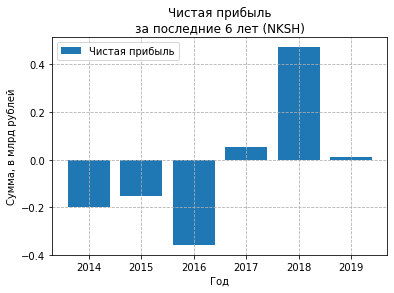

In [22]:
name = "Чистая прибыль"
# plt.plot(dt.index, dt['net_profit']*1e-9, marker='o', ms=10, label='Чистая прибыль')
plt.bar(dt.index, dt['net_profit']*1e-9, label='Чистая прибыль')
plt.xticks(dt.index, dt.index.astype('str'))
plt.legend()
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
# plt.savefig('../images/net_profit.png', dpi=200)

Чего нет, того нет

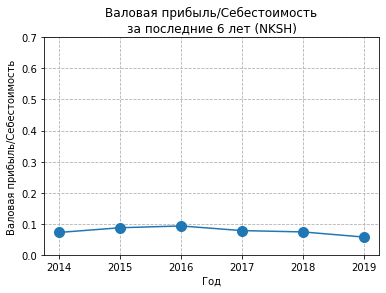

In [20]:
name = "Валовая прибыль/Себестоимость"
plt.plot(dt.index, dt['revenue']/dt['cost_price'] - 1, marker='o', ms=10, label=name)
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.ylim(0, 0.7)
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel(f'{name}')
plt.grid(ls='--')
# plt.savefig('../images/revenue_cost_price.png', dpi=200)

Соотношение валовой прибыли к себестоимости совершенно низкое: делают продукт за рубль, а продают за рубль десять

Кажется понятно, что сюда не нужно вкладывать деньги

Выглядит всё это печально, поэтому посмотрю [коэффициент текущей ликвидности](https://journal.tinkoff.ru/wiki/likvidnost/) - показывает, как компания может погашать текущие обязательства за счет только оборотных активов.
Чем выше коэффициент, тем выше платежеспособность предприятия. Если этот показатель ниже 1,5, значит, предприятие не в состоянии вовремя оплачивать все счета.

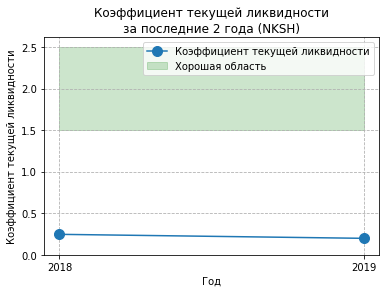

In [21]:
name = "Коэффициент текущей ликвидности"
plt.plot(dt.index, dt['current_assets']/dt['short_obligations'], marker='o', ms=10, label=name)
plt.fill_between([2018,2019], [1.5, 1.5], [2.5, 2.5], color='green', alpha=0.2, label='Хорошая область')
plt.xticks(dt[-2:].index, dt.index[-2:].astype('str'))
plt.legend()
plt.ylim(0, None)
plt.title(f'{name}\nза последние 2 года ({company})')
plt.xlabel('Год')
plt.ylabel(f'{name}')
plt.grid(ls='--')
# plt.savefig('../images/liquid.png', dpi=200)

Всё, видимо можно заканчивать

Теперь посмотрю детальнее на выручку

Здесь это уже не нужно

In [1]:
# sales_structure = \
# pd.Series([29.250, 14.292, 7.075, 6.824], index=['Россия','Азия', 'Европа', 'Прочее'])

In [2]:
# sales_structure.plot(kind='pie', subplots=True, figsize=(7, 5), autopct='%.2f', fontsize=14)
# plt.title(f"Распределение экспортной выручки\nпо регионам ({company}, 2019), в процентах", fontsize=14)
# plt.ylabel("");
# # plt.savefig('../images/revenue_export.png', dpi=200)

...

In [3]:
# sales_structure2 = \
# pd.Series([29.997, 20.611, 6.833], 
#           index=['Капролактам и\nпродукты переработки','Аммиак и азотные\nудобрения', 'Прочее'])

In [4]:
# sales_structure2.plot(kind='pie', subplots=False, figsize=(7, 5), autopct='%.2f', fontsize=14)
# plt.title(f"Распределение выручки по типу\nпродукции ({company}, 2019), в процентах", fontsize=14)
# plt.ylabel("");
# # plt.savefig('../images/revenue_kind.png', dpi=200)

Вывод по продуктам

## Конкуренты

## Риски

1. *...  риск* 
    (...)

## Дивидендная политика

> На  существующем  этапе  развития  основной  деятельности  дивидендная  политика  Общества  предусматривает  **направление  всей  прибыли  на  погашение  убытков  прошлых  лет**.  Однако  в  среднесрочной  перспективе  не  исключено,  что  акционеры  пересмотрят  дивидендную политику. (*из [годового отчёта 2019](https://shinakama.tatneft.ru/upload/files/%D0%93%D0%BE%D0%B4%D0%BE%D0%B2%D0%BE%D0%B9%20%D0%BE%D1%82%D1%87%D0%B5%D1%82%20%D0%9F%D0%90%D0%9E%20%D0%9D%D0%B8%D0%B6%D0%BD%D0%B5%D0%BA%D0%B0%D0%BC%D1%81%D0%BA%D1%88%D0%B8%D0%BD%D0%B0%20%D0%B7%D0%B0%202019%20%D0%B3%D0%BE%D0%B4.pdf)*)

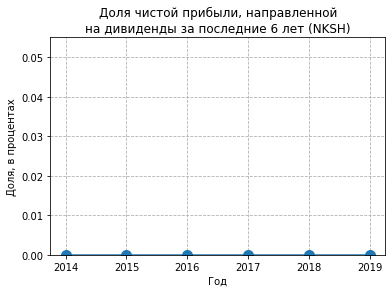

In [24]:
name = "Доля чистой прибыли, направленной\nна дивиденды"
plt.plot( dt.index, 100*dt['dividend']/dt['net_profit'], marker='o', ms=10, label='Дивиденды/акция' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name} за последние {n_years} лет ({company})')
plt.ylim(0, None)
plt.xlabel('Год')
plt.ylabel('Доля, в процентах')
plt.grid(ls='--')
# plt.savefig('../images/dividend_net_profit.png', dpi=200)

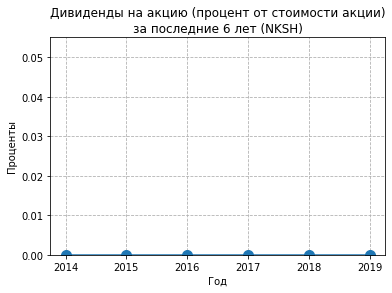

In [25]:
name = "Дивиденды на акцию (процент от стоимости акции)"
plt.plot( dt.index, 100*dt['dividend']/dt['n_shares']/dt['share_price'], marker='o', ms=10, label='' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.ylim(0, None)
plt.xlabel('Год')
plt.ylabel('Проценты')
plt.grid(ls='--')
# plt.savefig('../images/dividend_share_percent.png', dpi=200)

Да, дивидендов нет совершенно, полный ноль

## ROA

Отвечает на вопрос, выгоднее ли "владельцу" всё продать и положить деньги на депозит?

In [26]:
assets = dt['assets'].values
mean_assets = (assets[:-1] + assets[1:])/2

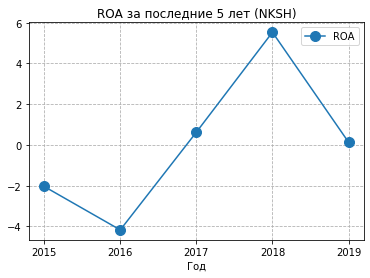

In [27]:
name = "ROA"
plt.plot( dt.index[1:], 100*dt['net_profit'][1:]/mean_assets, marker='o', ms=10, label=name )
plt.xticks(dt.index[1:], dt.index[1:].astype('str'))
plt.legend()
# plt.ylim(0, None)
plt.title(f'{name} за последние {n_years-1} лет ({company})')
plt.xlabel('Год')
plt.grid(ls='--')
# plt.savefig('../images/ROA.png', dpi=200)

Так, кому-то надо просто положить деньги в банк

## Оценка компании

Теперь, пользуясь мультипликаторами, можно попробовать проверить, недооценена или переоценена компания на бирже

### Капитализация PHOR

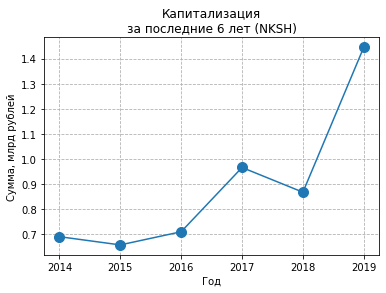

In [28]:
name = "Капитализация"
plt.plot( dt.index, dt['capitalization']*1e-9, marker='o', ms=10, label='Капитализация' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, млрд рублей')
plt.grid(ls='--')
# plt.savefig('../images/capitalization.png', dpi=200)

Капитализация в 2019 году подскочила, возможно это связано с их успешным отчётом за 2018 год

### P/E
Через сколько лет окупится инвестиция, если прибыль останется на том же уровне и всю прибыль руководство направит на дивиденды

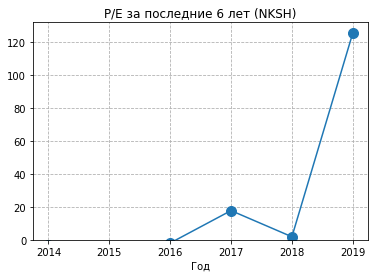

In [29]:
name = "P/E"
plt.plot( dt.index, dt['capitalization']/dt['net_profit'], marker='o', ms=10, label=name )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name} за последние {n_years} лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../images/PE.png', dpi=200)

В 2019 году компанию неадекватно переоценили

### P/S
Отношение рыночной капитализации компании к её годовой выручке. 
Показатель <1 может говорить о недооценённости компании

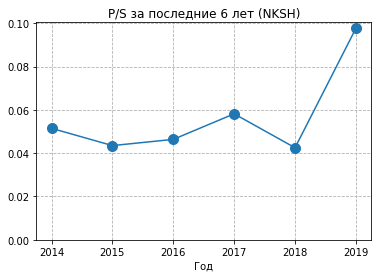

In [31]:
name = "P/S"
plt.plot( dt.index, dt['capitalization']/dt['revenue'], marker='o', ms=10, label=name )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name} за последние {n_years} лет ({company})')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../images/PS.png', dpi=200)

Так, а согласно этому показателю, компанию надо срочно брать

### EV/EBITDA

In [5]:
# name = 'EV/EBITDA'
# years = ['2016', '2017', '2018', '2019']
# ev_ebitda = [7.14, 6.88, 3.30, 7.25]
# plt.plot(years, ev_ebitda, marker='o', ms=10, label=name )
# # plt.legend()
# plt.title(f'{name} за последние 4 года ({company})')
# plt.xlabel('Год')
# # plt.ylabel('') 
# plt.ylim(0, None)
# plt.grid(ls='--')
# # plt.savefig('../images/EV_EBITDA.png', dpi=200)

...

In [6]:
# name = 'Долг/EBITDA'
# years = ['2015', '2016', '2017', '2018', '2019']
# debt_ebitda = [4.36, 3.68, 3.48, 1.38, 2.92]
# plt.plot(years, debt_ebitda, marker='o', ms=10, label=name )
# # plt.legend()
# plt.title(f'{name} за последние 5 лет ({company})')
# plt.xlabel('Год')
# # plt.ylabel('')
# plt.ylim(0, None)
# plt.grid(ls='--')
# # plt.savefig('../images/Debt_EBITDA.png', dpi=200)

## [Планы]() на будущее

1. ...

## Вывод

Показатели оставляют желать лучшего, когда станет лучше, тогда и посмотрим 